# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [37]:
# Your code here
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# generate a random integer between one and n
def random_number(n):
    return np.random.randint(1,n+1)
#print(random_number(3))

# door with goat to show before switch door
def goat(car_door,selected_door,n):
    doors = []
    for door in list(range(1,n+1)):
        if (door!= car_door)and(door != selected_door):
            doors.append(door)
    return doors

# swith the door
def switch(selected_door,show_goat, n):
    doors = []
    for door in list(range(1,n+1)):
        if (door!= selected_door)and(door != show_goat):
            doors.append(door)
    return doors

In [108]:
# number of doors
n = 3 
games = 10000
# Record the results of the simulated game if they changed versus if they did not.
# If win after first choose 1 , if not = 0
win_first_try = []
# If win after switch win = 1, not win = 0 
win_second_try = []

for i in range(games):
# generate a random integer between one and three to represent the door hiding the car
    car_door = random_number(n)
# generate a second integer between one and three representing the player's selection
    selected_door = random_number(n)

# the contestant did not choose, select a door concealing a goat to reveal
# it can be one door or two - then we work with array
    goat_door = goat(car_door, selected_door, n)
# show goat behind the door
    show_goat = np.random.choice(goat_door)
# if player swith the door
    switch_door = switch(selected_door, show_goat, n)[0]
# add information about game result into arrays
    if selected_door == car_door:
        win_first_try.append(1)
    else:
        win_first_try.append(0)
        
    if switch_door == car_door:
        win_second_try.append(1)
    else:
        win_second_try.append(0)

In [109]:
print(np.mean(win_first_try), np.mean(win_second_try))

0.3299 0.6701


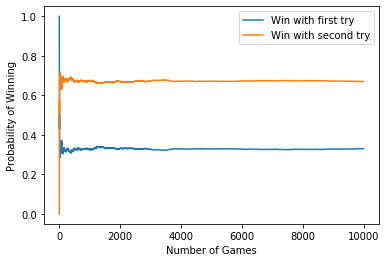

In [111]:
# Plots
x = list(range(1,games+1))
y1 = []
for i in x:
    y1.append(np.mean(win_first_try[:i]))
y2 = []
for i in x:
    y2.append(np.mean(win_second_try[:i]))
    
plt.plot(x, y1, label = 'Win with first try')    
plt.plot(x, y2, label = 'Win with second try')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Games')
plt.legend()

Simulated Probabilities:
Chance of Winning Keeping Selected Door:  0.3295
Chance of Winning Switching Selected Door:  0.6705


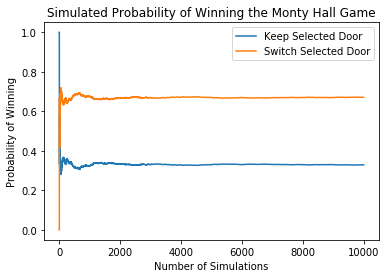

In [36]:
# Code from FS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

stay = []
switch = []
for i in range(10**4):
    car_door = np.random.randint(1,4)
    contestant_selection = np.random.randint(1,4)
    remaining_goats = [door for door in [1,2,3] if door!= car_door and door != contestant_selection]
    door_revealed = np.random.choice(remaining_goats)
    if_switch = [door for door in [1,2,3] if door != contestant_selection and door != door_revealed][0]
    # Record results if contestant changes door selection
    if if_switch == car_door:
        switch.append(1)
    else:
        switch.append(0)
    # Record results if contestant keep door selection
    if contestant_selection == car_door:
        stay.append(1)
    else:
        stay.append(0)
# Plot the results
plt.plot(range(1,10**4+1), [np.mean(stay[:i]) for i in range(1,10**4+1)], label='Keep Selected Door')
plt.plot(range(1,10**4+1), [np.mean(switch[:i]) for i in range(1,10**4+1)], label='Switch Selected Door')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Simulations')
plt.title('Simulated Probability of Winning the Monty Hall Game')
plt.legend()
print('Simulated Probabilities:')
print('Chance of Winning Keeping Selected Door: ', np.mean(stay))
print('Chance of Winning Switching Selected Door: ', np.mean(switch))

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 